In [19]:
import time
print(f'Last updated: {time.asctime()}')

Last updated: Sat Jun  1 20:21:33 2024


## The Nature Surfer is a project based of IoT & ML

# Process to be followed

Data Collection 📊: Gather relevant data sources for training and testing.

Data Cleaning 🧹: Prepare the dataset by handling missing values, outliers, and ensuring data quality.

Exploratory Data Analysis (EDA) 📊: Gain insights into the cleaned dataset, understanding its nuances and patterns.

Feature Engineering 🛠️: Create new informative features or transform existing ones to enhance model performance.

Model Building 🛠️: Utilize various machine learning algorithms to build predictive models.

Evaluation 📈: Rigorously assess model performance using diverse metrics.

Model Selection 🎉: Identify the most effective model for heart attack detection.

Hyperparameter Tuning ⚙️: Refine chosen model for optimal performance.

Model-Driven EDA 🧠: Utilize model insights to enhance understanding of the dataset.

Deployment 🚀: Implement the trained model into a production environment for real-world application.


In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Exploritory Data Analysis 



In [69]:
df= pd.read_csv("Crop_recommendation.csv")

In [17]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [20]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [21]:
pd.value_counts(df["label"])

/var/folders/dp/214k5srn50ldxjlg8chq7v6w0000gn/T/ipykernel_29037/578990880.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["label"])


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

/var/folders/dp/214k5srn50ldxjlg8chq7v6w0000gn/T/ipykernel_29037/3874987345.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  x,y = pd.value_counts(df["label"]).index, pd.value_counts(df["label"]).values
/var/folders/dp/214k5srn50ldxjlg8chq7v6w0000gn/T/ipykernel_29037/3874987345.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  x,y = pd.value_counts(df["label"]).index, pd.value_counts(df["label"]).values


<Figure size 2000x2000 with 0 Axes>

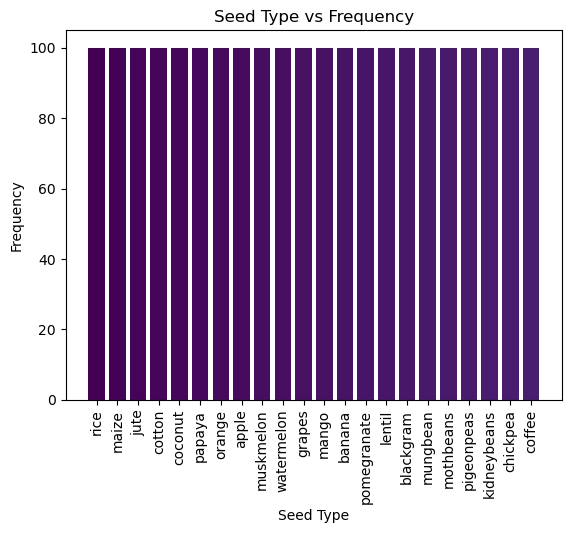

In [38]:
plt.figure(figsize=(20,20))
fig,ax= plt.subplots()
x,y = pd.value_counts(df["label"]).index, pd.value_counts(df["label"]).values
ax.bar(x,y, color= plt.cm.viridis.colors)
ax.tick_params(axis= "x", rotation=90) 
ax.set_xlabel("Seed Type")
ax.set_ylabel("Frequency")
ax.set_title("Seed Type vs Frequency")
plt.savefig("SeedTypeVsFrequency.jpg")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

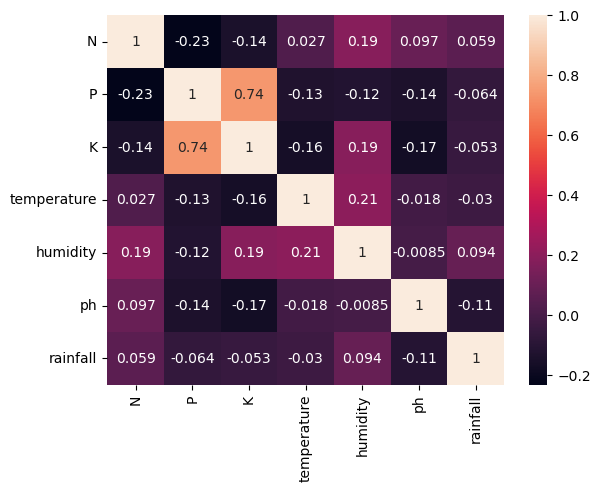

In [46]:
correlation=df[df.select_dtypes(include=["int64","float64"]).columns].corr()
sns.heatmap(correlation,annot=True)

In [45]:
correlation

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [47]:
grouped= df.groupby(by= "label").mean().reset_index()
grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


{'whiskers': [<matplotlib.lines.Line2D at 0x1226be060>,
 'caps': [<matplotlib.lines.Line2D at 0x1226be600>,
 'boxes': [<matplotlib.lines.Line2D at 0x1226bdd60>],
 'medians': [<matplotlib.lines.Line2D at 0x1226bebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1226beea0>],
 'means': []}

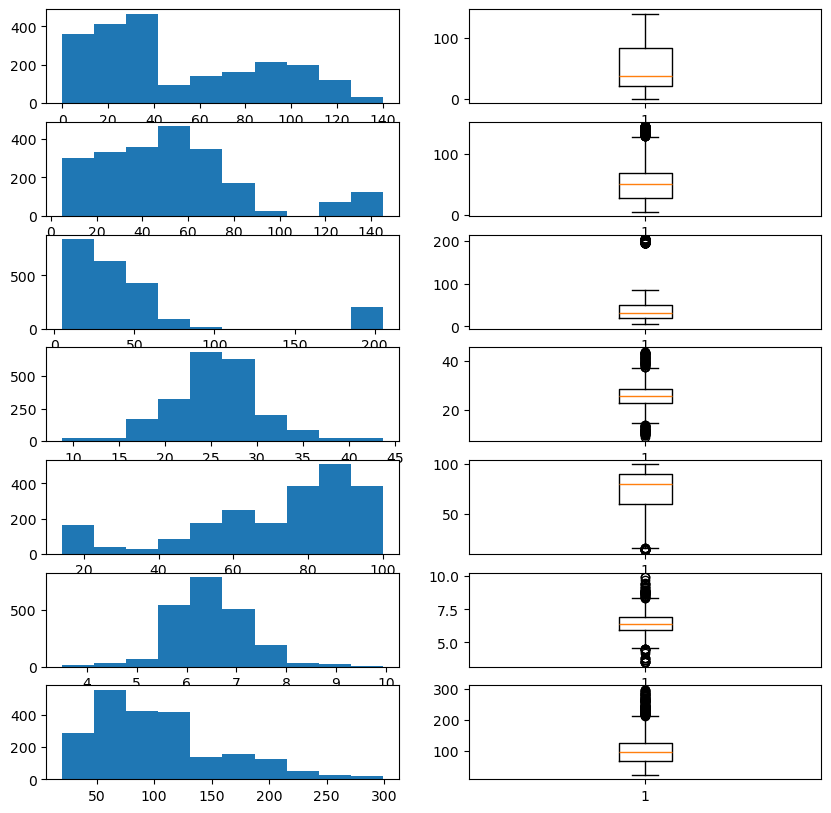

In [50]:
fig,axS= plt.subplots(7,2,figsize= (10,10))
axS[0,0].hist(df.N)
axS[0,1].boxplot(df.N)
axS[1,0].hist(df.P)
axS[1,1].boxplot(df.P)
axS[2,0].hist(df.K)
axS[2,1].boxplot(df.K)
axS[3,0].hist(df.temperature)
axS[3,1].boxplot(df.temperature)
axS[4,0].hist(df.humidity)
axS[4,1].boxplot(df.humidity)
axS[5,0].hist(df.ph)
axS[5,1].boxplot(df.ph)
axS[6,0].hist(df.rainfall)
axS[6,1].boxplot(df.rainfall)

In [52]:
for column in df.columns[:-1]:
        if column != 'target':
            z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
            df = df[z_scores <= 3]
    

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2030 non-null   int64  
 1   P            2030 non-null   int64  
 2   K            2030 non-null   int64  
 3   temperature  2030 non-null   float64
 4   humidity     2030 non-null   float64
 5   ph           2030 non-null   float64
 6   rainfall     2030 non-null   float64
 7   label        2030 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 142.7+ KB


## Logistic Regression, Random Forest, Linear SVC

In [55]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


One Hot Encoding 

In [57]:
names=df["label"].unique()

In [58]:
names

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [82]:
df["label"]=LabelEncoder().fit_transform(df.label)

In [83]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [84]:
X= df.drop(["label"],axis=1)
y=df["label"]

In [85]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [87]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [91]:
np.random.seed(42)
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])